In [28]:
#Import Statements

import numpy as np
from numpy.random import default_rng
%matplotlib inline
import matplotlib.pyplot as plt
rng = default_rng()

import os
import pandas as pd
import time as time
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [29]:
#For mock data generation
def Gaussian_2d(x,y, mean, std):
    distance = np.sqrt((x - mean[0])**2 + (y - mean[1])**2)
    return np.exp(-0.5*(distance)**2/std)

In [34]:
#Data Generation Process

data_length = 100
image_size = 48
gaussian_size = 2

#Train and Test data
output_shape = (image_size, image_size, 1)
input_shape = (image_size//4, image_size//4, 1)

image_list = []
image_reduced_list = []
image_re_resd_list = []
index = np.arange(image_size, dtype = int)

for i in range(data_length):
    image = np.zeros((image_size, image_size))
    mean = rng.normal(image_size/2, image_size/4, size = gaussian_size)
    std = rng.uniform(1, image_size/4)
    mean2 = rng.normal(image_size/2, image_size/4, size = gaussian_size)
    std2 = rng.uniform(1, image_size/8)
    mean3 = rng.normal(image_size/2, image_size/4, size = gaussian_size)
    std3 = rng.uniform(1, image_size/2)
    mean4 = rng.normal(image_size/2, image_size/4, size = gaussian_size)
    std4 = rng.uniform(1, image_size/16)
    image = np.zeros((image_size, image_size))
    for j in index:
        for k in index:
            image[j, k] += Gaussian_2d(j, k, mean, std)
            image[j, k] += Gaussian_2d(j, k, mean2, std2)
            image[j, k] += Gaussian_2d(j, k, mean3, std3)/4
            image[j, k] += Gaussian_2d(j, k, mean4, std4)*2
    image_tensor = tf.constant(image)
    
    image_tensor = image_tensor[..., tf.newaxis]
    image_list += [image_tensor]
    
    image_reduced = tf.image.resize(image_tensor, [image_size//4, image_size//4])/4
    image_reduced_list += [image_reduced]
    
    image_re_resd = tf.image.resize(image_reduced, [image_size, image_size], method='bicubic') 
    image_re_resd_list += [image_re_resd]

KeyboardInterrupt: 

In [ ]:
print(image_tensor.shape)
print(image_reduced.shape)
print(image_re_resd.shape)

In [ ]:
for i in range(10):
    eRosita_image = image_reduced_list[i].numpy()
    print(Chandra_image.shape)
    Chandra_image = image_list[i].numpy()
    
    plt.figure()
    plt.subplot(2, 1, 1)
    plt.title('eRosita')
    plt.imshow(np.log10(20*eRosita_image[:,:,0] + 1))
    plt.colorbar()
    plt.subplot(2, 1, 2)
    plt.title('Chandra')
    plt.imshow(np.log10(20*Chandra_image[:,:,0] + 1))
    plt.colorbar()
    plt.show()
    plt.close()

In [8]:
image_array = np.array(image_list)
image_spline_array = np.array(image_re_resd_list)

# training set
x_train = image_spline_array[:int(.9*data_length)]
y_train = image_array[:int(.9*data_length)]

# test set
x_test = image_spline_array[int(.9*data_length):]
y_test = image_array[int(.9*data_length):]

(90, 48, 48, 1)
(90, 48, 48, 1)


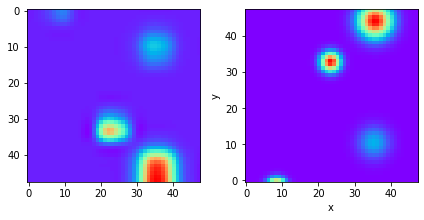

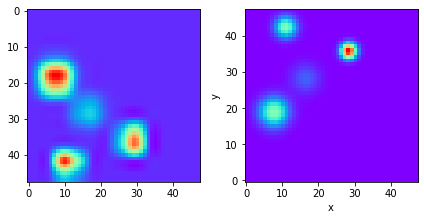

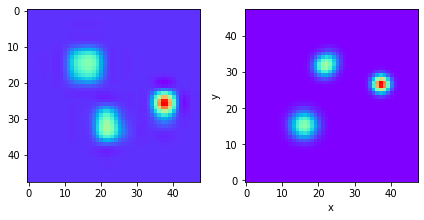

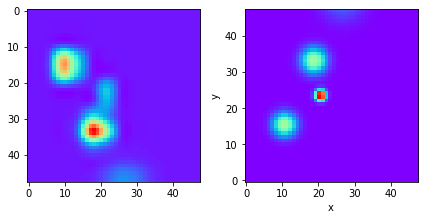

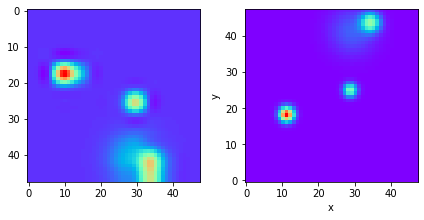

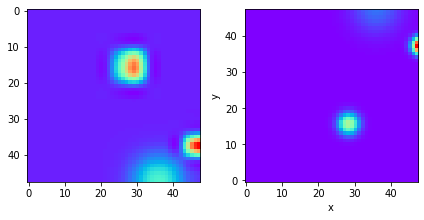

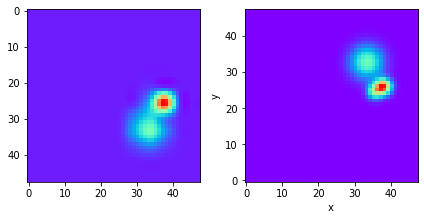

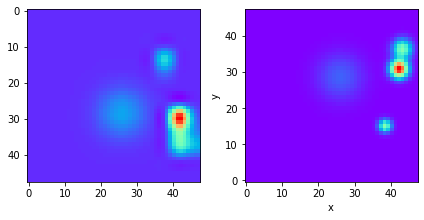

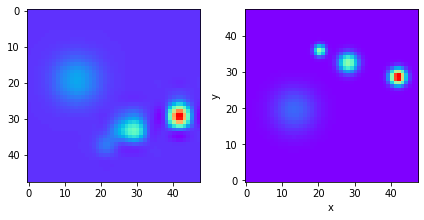

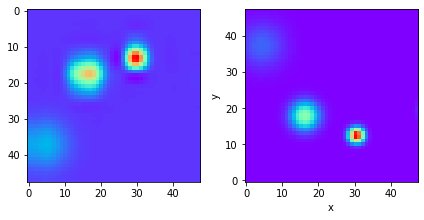

In [21]:
print(x_train.shape)
print(y_train.shape)

for i in range(10):
    x_image = x_test[i]
    y_image = y_test[i]

    fig, ax = plt.subplots(figsize=(6,6),nrows=1,ncols=2) 

    cmap = mpl.cm.rainbow

    x_im = ax[0].imshow(x_image,cmap=cmap,interpolation='none')
    y_im = ax[1].imshow(y_image,cmap=cmap,interpolation='none')

    ax = plt.gca()

    ax.set_xlabel("x"), ax.set_ylabel("y")
    ax.set_facecolor('white')

    plt.tight_layout()
    ax.invert_yaxis()
    plt.show()

    plt.close()

In [ ]:
concat = tf.keras.layers.Concatenate()

x0 = keras.Input(shape=output_shape)

print("x0")
print(x0)
print("")

elayer1 = keras.Sequential()
elayer1.add(layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding='same'))
elayer1.add(layers.MaxPooling2D((2, 2)))

x1 = elayer1(x0)

print("x1")
print(x1)
print("")

elayer2 = keras.Sequential()
elayer2.add(layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same'))
elayer2.add(layers.MaxPooling2D((2, 2)))

x2 = elayer2(x1)

print("x2")
print(x2)
print("")

elayer3 = keras.Sequential()
elayer3.add(layers.Conv2D(16, kernel_size=(3, 3), activation="relu", padding='same'))
elayer3.add(layers.MaxPooling2D((2, 2)))

x3 = elayer3(x2)

print("x3")
print(x3)
print("")

elayer4 = keras.Sequential()
elayer4.add(layers.Conv2D(8, kernel_size=(3, 3), activation="relu", padding='same'))
elayer4.add(layers.MaxPooling2D((2, 2)))


x4 = elayer4(x3)

print("x4")
print(x4)
print("")

dlayer1 = keras.Sequential()
dlayer1.add(layers.Conv2DTranspose(8, kernel_size=(3, 3), activation="relu", padding='same'))
dlayer1.add(layers.UpSampling2D((2, 2)))

x5 = dlayer1(x4)

print("x5")
print(x5)
print()
x6 = concat([x5,x3])

print("x6")
print(x6)
print()

dlayer2 = keras.Sequential()
dlayer2.add(layers.Conv2DTranspose(16, kernel_size=(3, 3), activation="relu", padding='same'))
dlayer2.add(layers.UpSampling2D((2, 2)))

x7 = dlayer2(x6)

print("x7")
print(x7)
print()

x8 = concat([x7, x2])

print("x8")
print(x8)
print()

dlayer3 = keras.Sequential()
dlayer3.add(layers.Conv2DTranspose(32, kernel_size=(3, 3), activation="relu", padding='same'))
dlayer3.add(layers.UpSampling2D((2, 2)))

x9 = dlayer3(x8)

print("x9")
print(x9)
print()

x10 = concat([x9, x1])

print("x10")
print(x10)
print()

dlayer4 = keras.Sequential()
dlayer4.add(layers.Conv2DTranspose(64, kernel_size=(3, 3), activation="relu", padding='same'))
dlayer4.add(layers.UpSampling2D((2, 2)))

x11 = dlayer4(x10)

print("x11")
print(x11)
print()

x12 = concat([x11, x0])

print("x11")
print(x11)
print()

x13 = layers.Conv2DTranspose(1, kernel_size=(3, 3), activation="relu", padding='same')(x12)

print("x13")
print(x13)
print()

In [ ]:
the_U = keras.Model(x0, x13)
learning_rate = 0.0005
the_U.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate), loss="mean_squared_error", metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
the_U.summary()

In [ ]:
epochs = 150
batch_size = 16
validation_split = 0.09

In [ ]:
def train_model(model, train_x, train_y, my_epochs, my_batch_size=None, my_validation_split=0.1):
    """Feed a dataset into the model in order to train it."""
    history = model.fit(x=train_x, y=train_y, batch_size=my_batch_size, epochs=my_epochs, verbose = 1, validation_split=my_validation_split)
    # Gather the model's trained weight and bias.
    trained_weight = model.get_weights()[0]
    trained_bias = model.get_weights()[1]

    # The list of epochs is stored separately from the
    # rest of history.
    epochs = history.epoch
  
    # Isolate the root mean squared error for each epoch.
    hist = pd.DataFrame(history.history)
    rmse = hist["root_mean_squared_error"]

    return epochs, rmse, history.history

In [ ]:
training_start = time.time()
# Train the model on the normalized training set.
history = the_U.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs, verbose = 1, validation_split=validation_split)

epochs = history.epoch
hist = pd.DataFrame(history.history)

print("Training Time: ", (time.time() - training_start)/60)

In [ ]:
print("\n Evaluate the new model against the test set:")
print(the_U.evaluate(x=x_test, y=y_test, batch_size=batch_size))



In [ ]:
prediction = the_U(x_test, training=False)

In [ ]:


for i in range(10):
    predict_image = prediction[i].numpy()
    x_test_image = x_test[i]
    y_test_image = y_test[i]

    plt.figure(figsize = (80,40))
    plt.subplot(4, 1, 1)
    plt.title('Input')
    plt.imshow(x_test_image[:,:,0], vmin = 0, vmax = 1.5, cmap = 'inferno')
    plt.colorbar()

    plt.subplot(4, 1, 2)
    plt.title('Prediction')
    plt.imshow(predict_image[:,:,0], vmin = 0, vmax = 1.5, cmap = 'inferno')
    plt.colorbar()

    plt.subplot(4, 1, 3)
    plt.title('Truth')
    plt.imshow(y_test_image[:,:,0], vmin = 0, vmax = 1.5, cmap = 'inferno')
    plt.colorbar()

    plt.subplot(4, 1, 4)
    plt.title('Contrast')
    plt.imshow(y_test_image[:,:,0] - predict_image[:,:,0], vmin = -1.5, vmax = 1.5, cmap = 'seismic')
    plt.colorbar()
    plt.show()
    plt.close()

In [ ]:
plt.figure()
plt.plot(epochs, hist['root_mean_squared_error'])
plt.plot(epochs, hist['val_root_mean_squared_error'])
plt.legend(labels = ['training','validation'])
plt.ylim([0,0.05])
plt.show()

In [ ]:
plt.figure()
plt.plot(epochs, hist['root_mean_squared_error'])
plt.plot(epochs, hist['val_root_mean_squared_error'])
plt.legend(labels = ['training','validation'])
plt.ylim([0,0.05])
plt.show()